In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('E:/Desktop/datasets/Customer_Satisfaction_Score.xlsx')
df.head(5)

,Age,Gender,Educational_Level,Occupation,Income Level,Frequency of Usage,Duration per session(min),Time of Day,Types of Transactions,Overall Satisfaction,Ease of Use,Speed of Transactions,Security Perception,Quality of Customer Support,Likelihood to Recommend,Churn Status
0,31,M,Master's,IT Professional,Medium,Yearly,4,Evening,Payments,1,4,4,2,4,2,Yes
1,40,F,High School,Marketing Manager,Low,Monthly,11,Evening,Payments,2,5,5,2,3,3,Yes
2,50,M,High School,IT Professional,Low,Yearly,60,Evening,Payments,3,3,2,1,1,4,No
3,29,M,High School,Retail Sales,Medium,Yearly,10,Evening,Transfers,5,5,4,5,2,5,No
4,74,M,High School,IT Professional,Medium,Monthly,52,Morning,Balance Inquiries,1,1,2,4,5,5,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          2000 non-null   int64 
 1   Gender                       2000 non-null   object
 2   Educational_Level            2000 non-null   object
 3   Occupation                   2000 non-null   object
 4   Income Level                 2000 non-null   object
 5   Frequency of Usage           2000 non-null   object
 6   Duration per session(min)    2000 non-null   int64 
 7   Time of Day                  2000 non-null   object
 8   Types of Transactions        2000 non-null   object
 9   Overall Satisfaction         2000 non-null   int64 
 10  Ease of Use                  2000 non-null   int64 
 11  Speed of Transactions        2000 non-null   int64 
 12  Security Perception          2000 non-null   int64 
 13  Quality of Customer Support  2000

In [4]:
df.describe()

,Age,Duration per session(min),Overall Satisfaction,Ease of Use,Speed of Transactions,Security Perception,Quality of Customer Support,Likelihood to Recommend
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,45.938500,30.425500,3.019500,3.038500,2.980500,3.047500,2.99300,2.991000
std,16.671373,17.082458,1.431134,1.411742,1.427634,1.422412,1.40959,1.414539
min,18.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,31.000000,15.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
50%,45.000000,30.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000
75%,61.000000,45.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000
max,75.000000,60.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000


In [5]:
numeric_columns = df.select_dtypes(include=['float64','int64'])
print(numeric_columns)

      Age  Duration per session(min)  Overall Satisfaction  Ease of Use   
0      31                          4                     1            4  \
1      40                         11                     2            5   
2      50                         60                     3            3   
3      29                         10                     5            5   
4      74                         52                     1            1   
...   ...                        ...                   ...          ...   
1995   41                          3                     1            5   
1996   18                         43                     2            5   
1997   55                         28                     4            4   
1998   59                          7                     1            3   
1999   69                         50                     1            1   

      Speed of Transactions  Security Perception  Quality of Customer Support   
0                 

<Axes: >

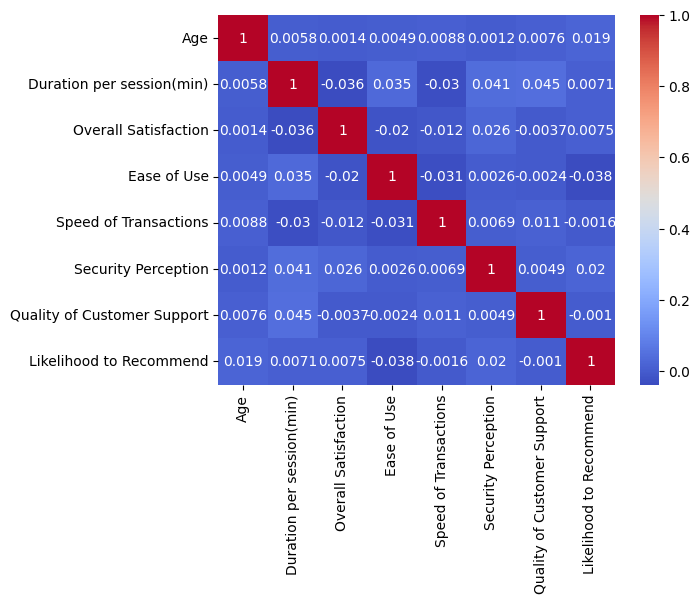

In [8]:
import seaborn as sns

sns.heatmap(numeric_columns.corr(),cmap='coolwarm',annot=True)

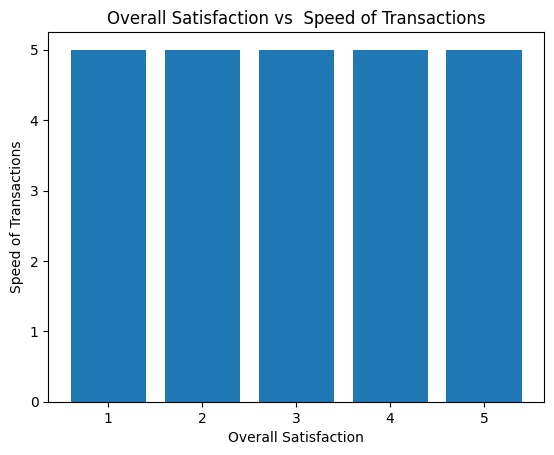

In [9]:
plt.bar(df['Overall Satisfaction'],df['Speed of Transactions'])
plt.title('Overall Satisfaction vs  Speed of Transactions')
plt.xlabel('Overall Satisfaction')
plt.ylabel('Speed of Transactions')
plt.show()

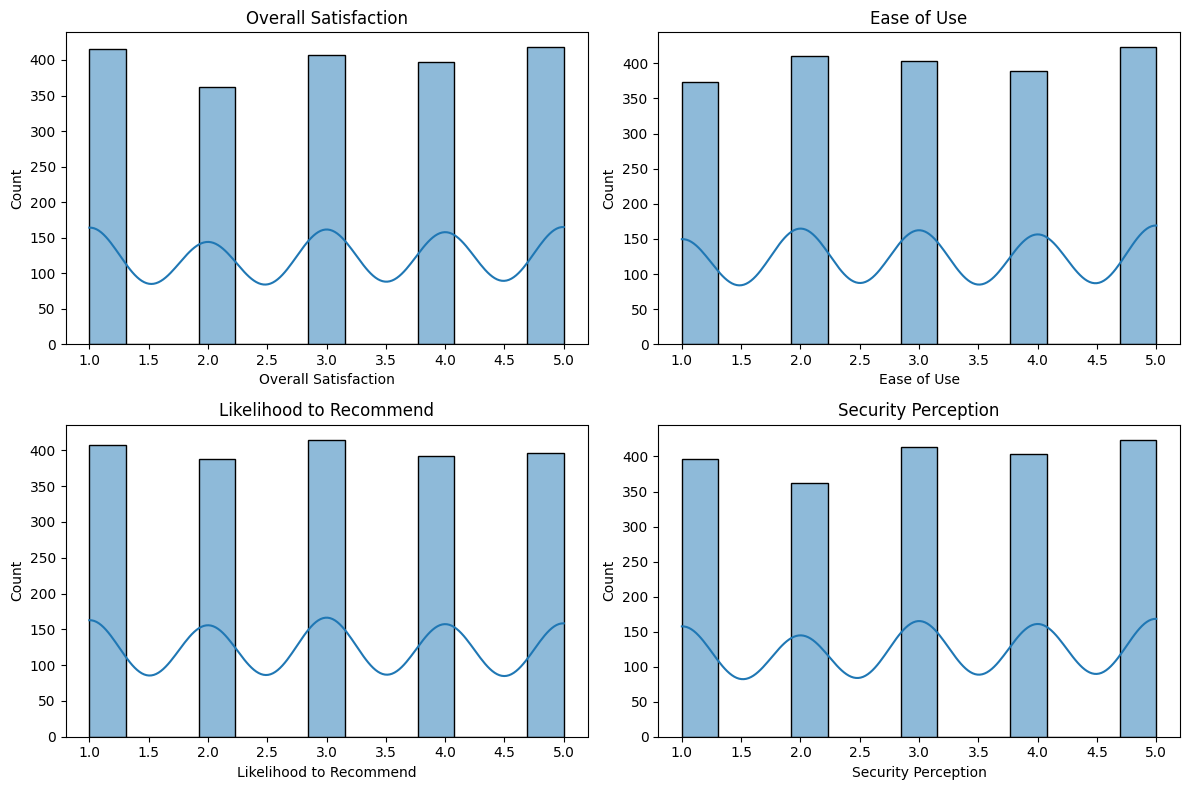

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.histplot(df['Overall Satisfaction'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Overall Satisfaction')
sns.histplot(df['Ease of Use'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Ease of Use')
sns.histplot(df['Likelihood to Recommend'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Likelihood to Recommend')
sns.histplot(df['Security Perception'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Security Perception')
plt.tight_layout()
plt.show()

In [6]:
import seaborn as sns

numeric_correlations = numeric_columns.corr()['Overall Satisfaction']
print(numeric_correlations)

Age                            0.001392
Duration per session(min)     -0.036333
Overall Satisfaction           1.000000
Ease of Use                   -0.020180
Speed of Transactions         -0.012056
Security Perception            0.025594
Quality of Customer Support   -0.003652
Likelihood to Recommend        0.007500
Name: Overall Satisfaction, dtype: float64


In [7]:
df.columns

Index(['Age', 'Gender', 'Educational_Level', 'Occupation', 'Income Level',
       'Frequency of Usage', 'Duration per session(min)', 'Time of Day',
       'Types of Transactions', 'Overall Satisfaction', 'Ease of Use',
       'Speed of Transactions', 'Security Perception',
       'Quality of Customer Support', 'Likelihood to Recommend',
       'Churn Status'],
      dtype='object')

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from  sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop('Overall Satisfaction', axis=1)
y = df['Overall Satisfaction']

categorical_cols = ['Gender', 'Educational_Level', 'Occupation', 'Income Level', 'Frequency of Usage', 'Time of Day', 'Types of Transactions', 'Churn Status']
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))  
model.add(LSTM(units=50))
model.add(Dropout(0.2))  
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


c:\Users\sys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
1600/1600 [==============================] - 12s 4ms/step - loss: 2.7701
Epoch 2/100
1600/1600 [==============================] - 7s 4ms/step - loss: 2.1636
Epoch 3/100
1600/1600 [==============================] - 7s 5ms/step - loss: 2.0838
Epoch 4/100
1600/1600 [==============================] - 8s 5ms/step - loss: 2.0536
Epoch 5/100
1600/1600 [==============================] - 8s 5ms/step - loss: 2.0134
Epoch 6/100
1600/1600 [==============================] - 8s 5ms/step - loss: 1.9585
Epoch 7/100
1600/1600 [==============================] - 8s 5ms/step - loss: 1.9328
Epoch 8/100
1600/1600 [==============================] - 8s 5ms/step - loss: 1.8520
Epoch 9/100
1600/1600 [==============================] - 8s 5ms/step - loss: 1.8129
Epoch 10/100
1600/1600 [==============================] - 8s 5ms/step - loss: 1.7930
Epoch 11/100
1600/1600 [==============================] - 8s 5ms/step - loss: 1.7317
Epoch 12/100
1600/1600 [==============================] - 8s 5ms/step - l

In [9]:
df.columns

Index(['Age', 'Gender', 'Educational_Level', 'Occupation', 'Income Level',
       'Frequency of Usage', 'Duration per session(min)', 'Time of Day',
       'Types of Transactions', 'Overall Satisfaction', 'Ease of Use',
       'Speed of Transactions', 'Security Perception',
       'Quality of Customer Support', 'Likelihood to Recommend',
       'Churn Status'],
      dtype='object')

In [10]:
df

,Age,Gender,Educational_Level,Occupation,Income Level,Frequency of Usage,Duration per session(min),Time of Day,Types of Transactions,Overall Satisfaction,Ease of Use,Speed of Transactions,Security Perception,Quality of Customer Support,Likelihood to Recommend,Churn Status
0,31,M,Master's,IT Professional,Medium,Yearly,4,Evening,Payments,1,4,4,2,4,2,Yes
1,40,F,High School,Marketing Manager,Low,Monthly,11,Evening,Payments,2,5,5,2,3,3,Yes
2,50,M,High School,IT Professional,Low,Yearly,60,Evening,Payments,3,3,2,1,1,4,No
3,29,M,High School,Retail Sales,Medium,Yearly,10,Evening,Transfers,5,5,4,5,2,5,No
4,74,M,High School,IT Professional,Medium,Monthly,52,Morning,Balance Inquiries,1,1,2,4,5,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,41,M,Bachelor's,Consultant,High,Monthly,3,Evening,Payments,1,5,4,2,1,2,Yes
1996,18,F,Doctorate,Marketing Manager,Low,Monthly,43,Evening,Balance Inquiries,2,5,2,4,1,5,No
1997,55,F,Doctorate,Consultant,Medium,Daily,28,Morning,Balance Inquiries,4,4,1,4,2,5,No
1998,59,M,Doctorate,Marketing Manager,High,Daily,7,Afternoon,Transfers,1,3,5,2,1,4,No


In [16]:
new_data = {'Age':40, 'Gender':'F', 'Educational_Level':"Bachelor's", 'Occupation':'Retail Sales', 'Income Level':"Medium",
       'Frequency of Usage':"Monthly", 'Duration per session(min)':10, 'Time of Day':"Evening",
       'Types of Transactions':"Transfers",'Ease of Use':2,
       'Speed of Transactions':1, 'Security Perception':4,
       'Quality of Customer Support':3, 'Likelihood to Recommend':2,
       'Churn Status':"Yes"}

new_data = pd.DataFrame([new_data])

In [17]:
new_data

,Age,Gender,Educational_Level,Occupation,Income Level,Frequency of Usage,Duration per session(min),Time of Day,Types of Transactions,Ease of Use,Speed of Transactions,Security Perception,Quality of Customer Support,Likelihood to Recommend,Churn Status
0,40,F,Bachelor's,Retail Sales,Medium,Monthly,10,Evening,Transfers,2,1,4,3,2,Yes


In [18]:
new_categorical_cols = ['Gender', 'Educational_Level', 'Occupation', 'Income Level', 'Frequency of Usage', 'Time of Day', 'Types of Transactions', 'Churn Status']
new_X_encoded = pd.DataFrame(encoder.transform(new_data[new_categorical_cols]), columns=encoder.get_feature_names_out(new_categorical_cols))
new_X = pd.concat([new_data.drop(new_categorical_cols, axis=1), new_X_encoded], axis=1)
new_X_scaled = scaler.transform(new_X)
new_X_reshaped = new_X_scaled.reshape((new_X_scaled.shape[0], 1, new_X_scaled.shape[1]))
new_y_pred = model.predict(new_X_reshaped)

1/1 [==============================] - 5s 5s/step


In [19]:
print(np.round(new_y_pred))

[[4.]]
